In [2]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import plotly.io as pio
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
import pandas as pd
import webbrowser
import itertools

In [4]:
plt.rcParams['figure.dpi'] = 350
filepath = r'D:\Caltech\photogalvanic_atCaltech\Nonlinear_generation\Cauchy_refractive_index_fitting\data_for_n\SiO2 (Thermally grown substrate) (Shijia-UCSB 2024a n 0.440-1.688 µm).txt'
data = np.loadtxt(filepath)
w = data[:, 0]
n = data[:, 1]

In [14]:
def cauchy_formula(lambda_m, A, B, C, D):
    return A + B / lambda_m**2 + C / lambda_m**4 + D / lambda_m**6

initial_guess = [1.5, 1e-14, 1e-25, 1e-36]
popt, pcov = curve_fit(cauchy_formula, w, n, p0=initial_guess)
A, B, C, D = popt
w_nm = w * 1e9
w_nm_test = np.linspace(300,1600,10000)
n_fitted = cauchy_formula(w_nm_test * 1e-9, A, B, C, 0)

matplot = False
plotly = True

if matplot:
    # Plot the original data and the fitted curve
    plt.figure()
    plt.plot(w_nm, n, 'rx', label='Original data')
    plt.plot(w_nm_test, n_fitted, 'b-', label='Fitted curve')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Refractive Index (n)')
    plt.title('Cauchy Fit for Refractive Index of SiO2')
    plt.legend()
    plt.show()
    
if plotly:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=w_nm, y=n, mode='markers', name='Original data', marker=dict(color='red', symbol='x')))
    fig.add_trace(go.Scatter(x=w_nm_test, y=n_fitted, mode='lines', name='Fitted curve', line=dict(color='blue')))
    fig.update_layout(
        title='Cauchy Fit for Refractive Index of SiO2',
        xaxis_title='Wavelength (nm)',
        yaxis_title='Refractive Index (n)',
        legend=dict(x=0.01, y=0.99),
    )
    html_file = 'cauchy_fit_plot.html'
    fig.write_html(html_file)
    webbrowser.open(html_file)

In [5]:
xi = 100
xf = 300

w_reduce = w[xi:xf]
n_reduce = n[xi:xf]

def cauchy_formula(lambda_m, A, B, C, D):
    return A + B / lambda_m**2 + C / lambda_m**4 + D / lambda_m**6

initial_guess = [1.5, 1e-18, 3e-25, 1e-36]
popt, pcov = curve_fit(cauchy_formula, w_reduce, n_reduce, p0=initial_guess)
A, B, C, D = popt
w_nm = w * 1e9
w_nm_test = np.linspace(300,1600,10000)
n_fitted = cauchy_formula(w_nm_test * 1e-9, A, B, C, D)

matplot = False
plotly = True

if matplot:
    # Plot the original data and the fitted curve
    plt.figure()
    plt.plot(w_nm, n, 'rx', label='Original data')
    plt.plot(w_nm_test, n_fitted, 'b-', label='Fitted curve')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Refractive Index (n)')
    plt.title('Cauchy Fit for Refractive Index of SiO2')
    plt.legend()
    plt.show()
    
if plotly:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=w*1e9, y=n, mode='markers', name='Original data', marker=dict(color='red', symbol='x')))
    fig.add_trace(go.Scatter(x=w_nm_test, y=n_fitted, mode='lines', name='Fitted curve', line=dict(color='blue')))
    fig.update_layout(
        title='Cauchy Fit for Refractive Index of SiO2',
        xaxis_title='Wavelength (nm)',
        yaxis_title='Refractive Index (n)',
        legend=dict(x=0.01, y=0.99),
    )
    html_file = 'cauchy_fit_plot.html'
    fig.write_html(html_file)
    webbrowser.open(html_file)
print(popt)

[ 1.44275491e+00  8.79567636e-15 -7.35086347e-28 -2.67659540e-43]


In [33]:
w[350]*1e9

992.0100000000001

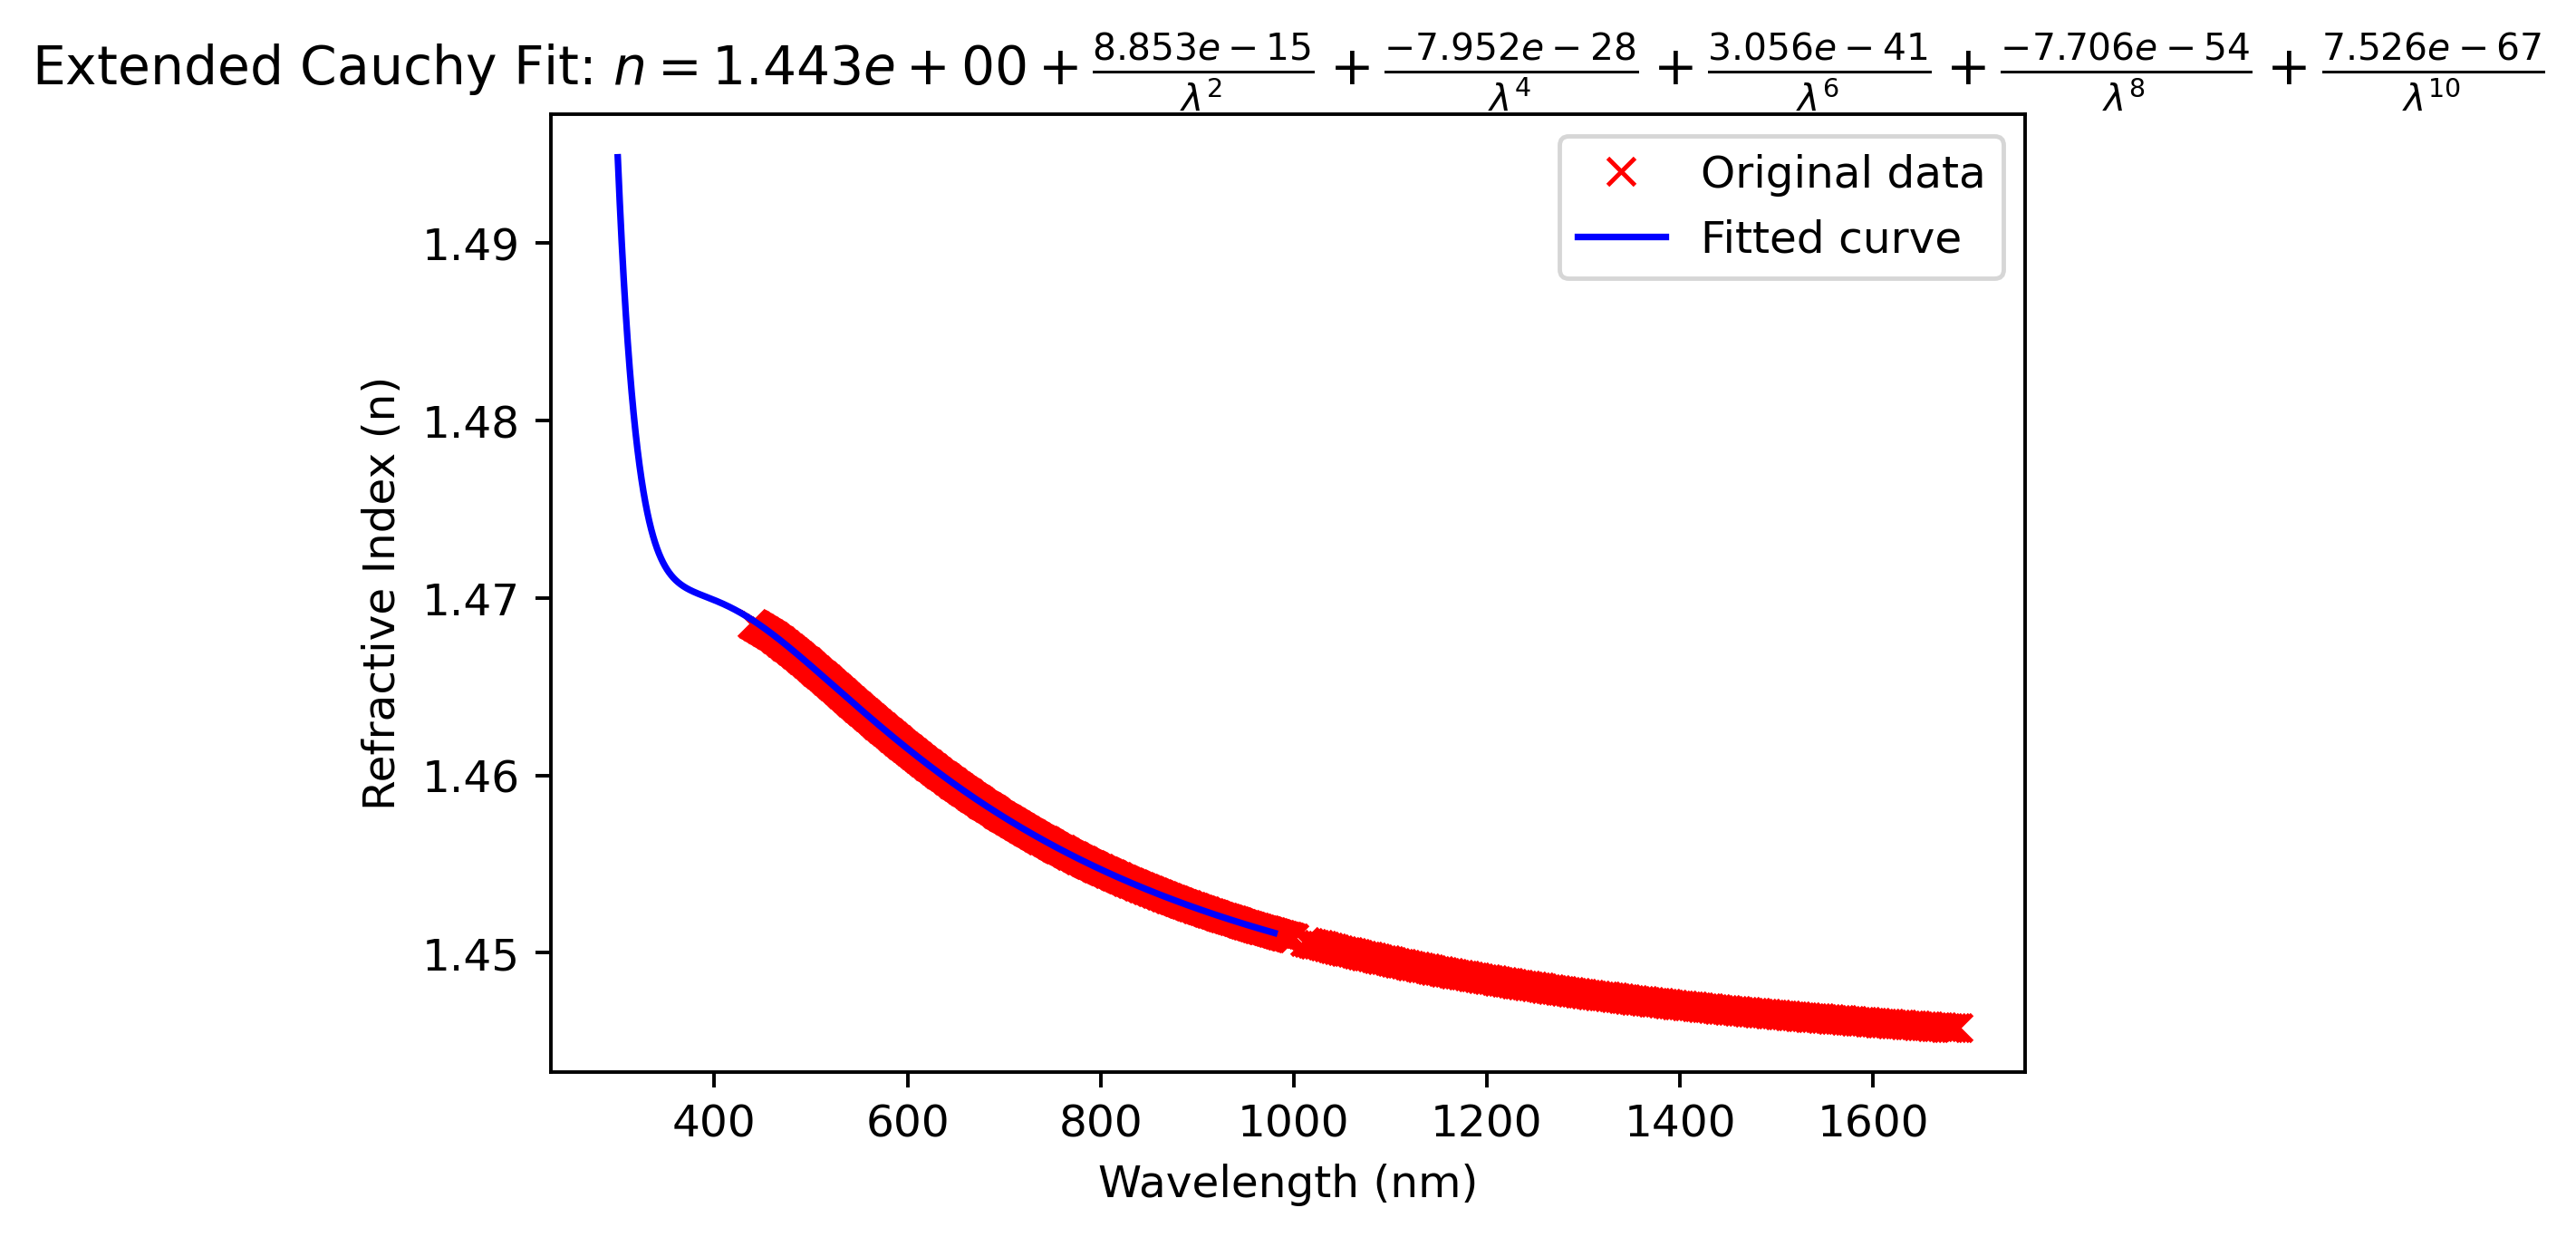

Fitted parameters: A = 1.4427338902189628, B = 8.852680266253703e-15, C = -7.951856327636054e-28, D = 3.0558936247787795e-41, E = -7.706190365791242e-54, F = 7.526327780258616e-67


In [8]:
# test gpt
# Reduce the data
xi = 100
xf = 352
w_reduce = w[xi:xf]
n_reduce = n[xi:xf]

# Define the extended Cauchy formula
def extended_cauchy_formula(lambda_m, A, B, C, D, E, F):
    return A + B / lambda_m**2 + C / lambda_m**4 + D / lambda_m**6 + E / lambda_m**8 + F / lambda_m**10

# Initial guess for the parameters A, B, C, D, E, F
initial_guess = [1.5, 1e-18, 3e-25, 1e-36, 1e-45, 1e-54]

# Perform the curve fitting
popt, pcov = curve_fit(extended_cauchy_formula, w_reduce, n_reduce, p0=initial_guess)

# Extract the fitted parameters
A, B, C, D, E, F = popt

# Convert wavelength to nanometers for plotting
w_nm = w * 1e9
w_nm_test = np.linspace(300, 980, 100000)
n_fitted = extended_cauchy_formula(w_nm_test * 1e-9, A, B, C, D, E, F)

matplot = True
plotly = False

if matplot:
    # Plot the original data and the fitted curve
    plt.figure()
    plt.plot(w_nm, n, 'rx', label='Original data')
    plt.plot(w_nm_test, n_fitted, 'b-', label='Fitted curve')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Refractive Index (n)')
    plt.title( f"Extended Cauchy Fit: $n = {A:.3e} + \\frac{{{B:.3e}}}{{\\lambda^2}} + \\frac{{{C:.3e}}}{{\\lambda^4}} + \\frac{{{D:.3e}}}{{\\lambda^6}} + \\frac{{{E:.3e}}}{{\\lambda^8}} + \\frac{{{F:.3e}}}{{\\lambda^{{10}}}}$",
)
    plt.savefig('fitted_plot.png', bbox_inches='tight', pad_inches=0, facecolor='white')
    
    plt.legend()
    plt.show()
    
if plotly:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=w*1e9, y=n, mode='markers', name='Original data', marker=dict(color='red', symbol='x')))
    fig.add_trace(go.Scatter(x=w_nm_test, y=n_fitted, mode='lines', name='Fitted curve', line=dict(color='blue')))
    fig.update_layout(
        title=f"Extended Cauchy Fit: $n = {A:.3e} + \\frac{{{B:.3e}}}{{\\lambda^2}} + \\frac{{{C:.3e}}}{{\\lambda^4}} + \\frac{{{D:.3e}}}{{\\lambda^6}} + \\frac{{{E:.3e}}}{{\\lambda^8}} + \\frac{{{F:.3e}}}{{\\lambda^{{10}}}}$",
        xaxis_title='Wavelength (nm)',
        yaxis_title='Refractive Index (n)',
        legend=dict(x=0.01, y=0.99),
        
    )
    fig.update_yaxes(range=[1.4, 1.48])

    html_file = 'extended_cauchy_fit_plot.html'
    fig.write_html(html_file)
    webbrowser.open(html_file)

print(f"Fitted parameters: A = {A}, B = {B}, C = {C}, D = {D}, E = {E}, F = {F}")

In [53]:
# Generate test data
w_nm_test = np.linspace(300, 980, 100000) * 1e-9
n_fitted = extended_cauchy_formula(w_nm_test, A, B, C, D, E, F)

# Combine the arrays into a single 2D array for saving
data_to_save = np.column_stack((w_nm_test, n_fitted))

# Save the data to a text file with high precision
np.savetxt('fitted_data.txt', data_to_save, fmt='%.18e\t%.15f')

In [52]:
print(n_fitted)

[1.49484943 1.49484058 1.49483173 ... 1.45111605 1.45111594 1.45111584]
